In [1]:
from qiskit import QuantumCircuit

In [2]:
n = 3  # Number of qubits for a simple quantum walk
qc = QuantumCircuit(n)

# Initialize in superposition (Hadamard on first qubit)
qc.h(0)

# Apply a controlled NOT to create entanglement
qc.cx(0, 1)

# Add a second Hadamard gate
qc.h(1)

# Measure
qc.measure_all()

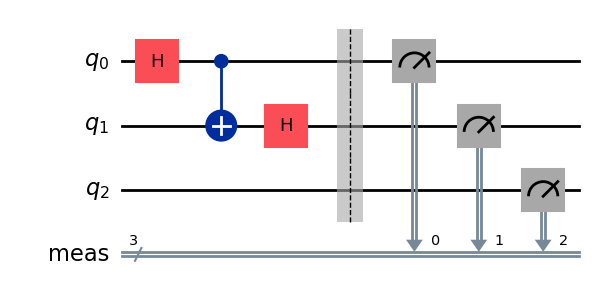

In [3]:
qc.draw("mpl", style="iqp")

In [4]:
# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)

In [5]:
from qiskit.primitives import StatevectorSampler
 
sampler = StatevectorSampler()

In [6]:
# execute 1 circuit with Sampler
job = sampler.run([isa_circuit])
pub_result = job.result()[0]

print(f" > Result class: {type(pub_result)}")

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>


In [7]:
# Access result data for PUB 0
data_pub = pub_result.data

In [8]:
# Access bitstring for the classical register "meas"
bitstrings = data_pub.meas.get_bitstrings()

In [9]:
print(f"The number of bitstrings is: {len(bitstrings)}")

The number of bitstrings is: 1024


In [10]:
# Get counts for the classical register "meas"
counts = data_pub.meas.get_counts()
print(f"The counts are: {counts}")

The counts are: {'010': 268, '000': 252, '011': 244, '001': 260}


In [11]:
from qiskit.visualization import plot_histogram

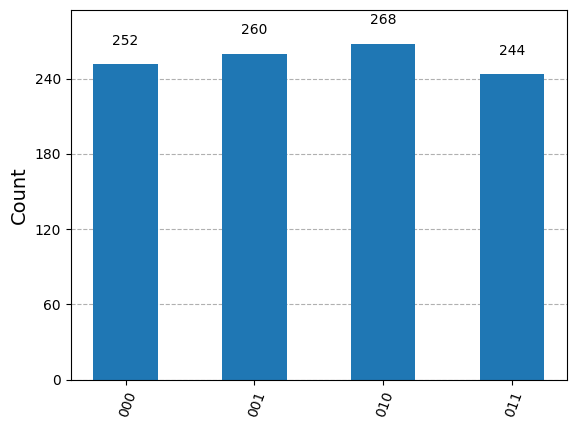

In [12]:
plot_histogram(counts)

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Number of qubits for a simple quantum walk
n = 3  
qc = QuantumCircuit(n)

# Quantum Coin Flip (Superposition)
# Apply a Hadamard gate on the first qubit to create a superposition of |0⟩ and |1⟩.
# This simulates the coin flip, where |0⟩ corresponds to "left" and |1⟩ corresponds to "right."
qc.h(0)

# Conditional Shift (Entanglement)
# Use a CNOT gate (Controlled-NOT) to entangle the coin qubit (q0) with the position qubit (q1).
# The shift (movement) of the walker depends on the outcome of the coin flip.
# If the coin (q0) is in state |0⟩, it applies a shift (move "left"), otherwise, it applies the opposite shift (move "right").
qc.cx(0, 1)

# Interference (Quantum Effects)
# Apply a second Hadamard gate on the position qubit (q1) to introduce interference.
# This interference ensures that the final probability distribution will have a non-classical pattern, characteristic of quantum walks.
qc.h(1)

# Measurement (Final Position Distribution)
# Measure the state of all qubits to collapse the quantum state into one of the possible outcomes.
# The measurement will give us the final position distribution of the walker after applying the quantum walk steps.
qc.measure_all()

# Simulate the quantum walk
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, simulator)
qobj = assemble(transpiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts()

# Convert counts to probability distribution
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}

# Sort results for plotting
sorted_states = sorted(probabilities.keys())
sorted_probs = [probabilities[state] for state in sorted_states]

# Plot the probability distribution
plot_histogram(counts)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# # Number of qubits for a simple quantum walk
# n = 3  
# qc = QuantumCircuit(n)

# # Quantum Walk Steps
# qc.h(0)         # Coin flip (superposition)
# qc.cx(0, 1)     # Conditional shift (entanglement)
# qc.h(1)         # Interference

# # Measurement
# qc.measure_all()

# # Simulate
# simulator = Aer.get_backend('aer_simulator')
# transpiled_circuit = transpile(qc, simulator)
# qobj = assemble(transpiled_circuit)
# result = simulator.run(qobj).result()
# counts = result.get_counts()

# # Convert counts to probability distribution
# total_shots = sum(counts.values())
# probabilities = {state: count / total_shots for state, count in counts.items()}

# # Sort results for plotting
# sorted_states = sorted(probabilities.keys())
# sorted_probs = [probabilities[state] for state in sorted_states]

# # Plot the probability distribution
# plt.figure(figsize=(8, 5))
# plt.bar(sorted_states, sorted_probs, color='blue', alpha=0.7)
# plt.xlabel("Quantum State (Binary)")
# plt.ylabel("Probability")
# plt.title("Quantum Walk Probability Distribution")
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()
